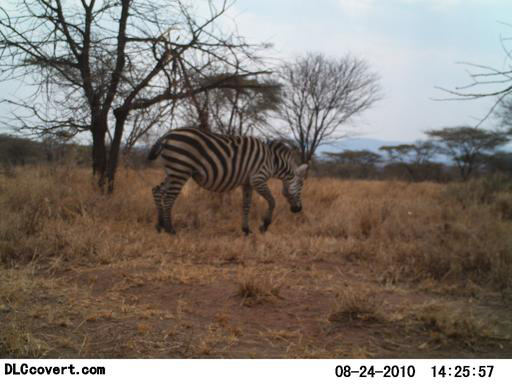

In [1]:
from PIL import Image
im=Image.open('S1/B06/B06_R3/S1_B06_R3_PICT0018.JPG','r')
im

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
species_labels=pd.read_csv('species_labels.csv')
species_labels

Unnamed: 0  category_id   species season             datetime count  \
0                0            0     empty     S1  2010-08-02 11:43:14     0   
1                1            0     empty     S1  2010-07-20 15:23:10     0   
2                2            0     empty     S1  2010-07-21 14:34:02     0   
3                3            0     empty     S1  2010-08-03 01:06:08     0   
4                4            0     empty     S1  2010-08-10 17:58:00     0   
...            ...          ...       ...    ...                  ...   ...   
488563      488563           48  reptiles     S1  2010-09-23 11:56:36     1   
488564      488564           48  reptiles     S1  2010-09-23 11:56:36     1   
488565      488565           48  reptiles     S1  2010-10-01 13:40:06     2   
488566      488566           48  reptiles     S1  2010-10-01 13:40:06     2   
488567      488567           48  reptiles     S1  2010-10-01 13:40:06     2   

                                    image_id  
0       S1/B04/B04_R1/S1_B04_R1_PICT0014.JPG  
1       S1/B05/B05_R1/S1_B05_R1_PICT0004.JPG  
2       S1/B05/B05_R1/S1_B05_R1_PICT0008.JPG  
3       S1/B05/B05_R1/S1_B05_R1_PICT0050.JPG  
4       S1/B05/B05_R1/S1_B05_R1_PICT0074.JPG  
...                                      ...  
488563  S1/U13/U13_R1/S1_U13_R1_PICT0084.JPG  
488564  S1/U13/U13_R1/S1_U13_R1_PICT0085.JPG  
488565  S1/U13/U13_R1/S1_U13_R1_PICT0359.JPG  
488566  S1/U13/U13_R1/S1_U13_R1_PICT0360.JPG  
488567  S1/U13/U13_R1/S1_U13_R1_PICT0361.JPG  

[488568 rows x 7 columns]

In [3]:
from fastai.vision.all import *

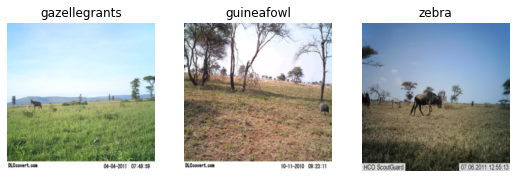

In [4]:
def get_x(r): return r['image_id']
def get_y(r): return r['species']
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = Resize(256, ResizeMethod.Squish))

dls = dblock.dataloaders(species_labels,bs=16)
dls.show_batch(nrows=1,ncols=3)

In [5]:
fscore = FBeta(average='macro', beta=1)
learn = cnn_learner(dls, resnet50, metrics=[accuracy, fscore, error_rate])

SuggestedLRs(lr_min=0.002290867641568184, lr_steep=3.311311274956097e-06)

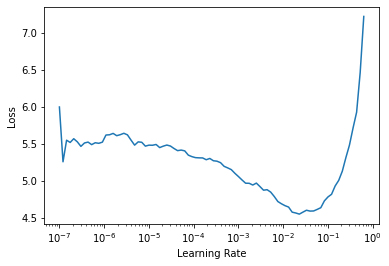

In [6]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(5,lr_max=slice(1e-6,0.002),cbs=[SaveModelCallback(monitor='valid_loss',
                                                                      every_epoch=True,
                                                                      fname='batch_tfms_best')])

In [9]:
learn.save('stage_1_try_2')

Path('models/stage_1_try_2.pth')

In [12]:
learn.load('stage_1_try_2')

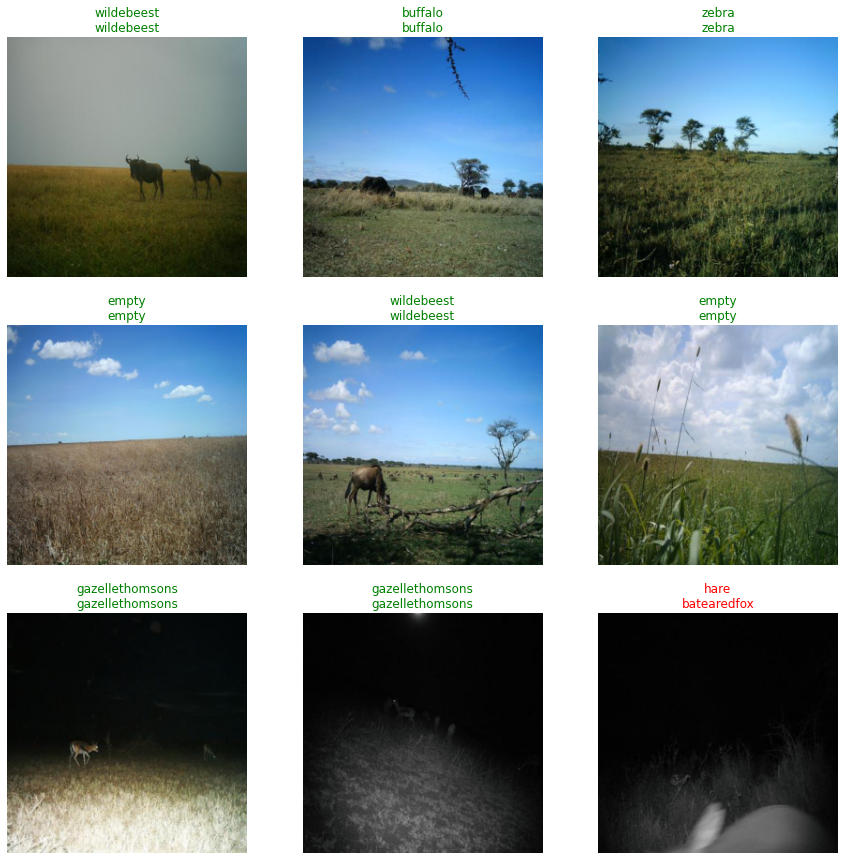

In [14]:
learn.show_results(figsize=(15,15))

In [15]:
learn.unfreeze()

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=7.585775847473997e-07)

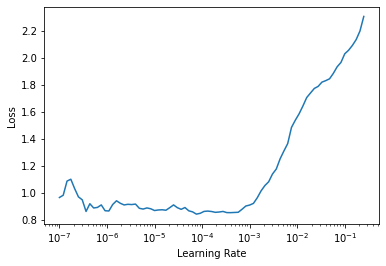

In [16]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(5,lr_max=slice(7e-6,1e-3),cbs=[SaveModelCallback(monitor='valid_loss',
                                                                      every_epoch=True,
                                                                      fname='stage_2_binary')])

In [19]:
learn.save('stage_2_try_2')

Path('models/stage_2_try_2.pth')

In [14]:
learn.load('stage_2_try_2')

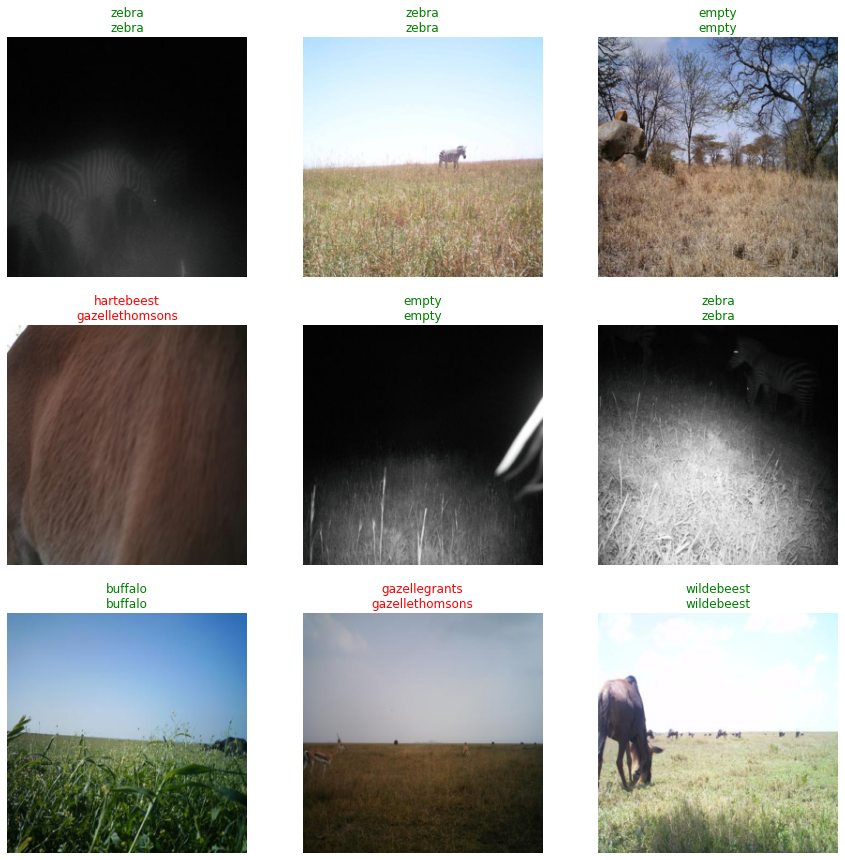

In [22]:
learn.show_results(figsize=(15,15))
plt.savefig('stage_2_validation_sample.png')
#top is prediction, bottom is actual

In [15]:
learn.unfreeze()

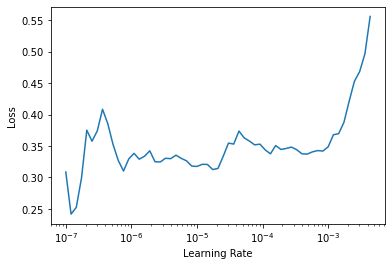

In [16]:
learn.lr_find(show_plot=True)
plt.savefig('lr_plot.png')

In [17]:
learn.fit_one_cycle(5,lr_max=slice(1e-6,1e-3),cbs=[SaveModelCallback(monitor='valid_loss',
                                                                      every_epoch=True,
                                                                      fname='stage_3')])

In [18]:
learn.save('stage_3_try_2')

Path('models/stage_3_try_2.pth')

In [6]:
learn.load('stage_3_try_2')

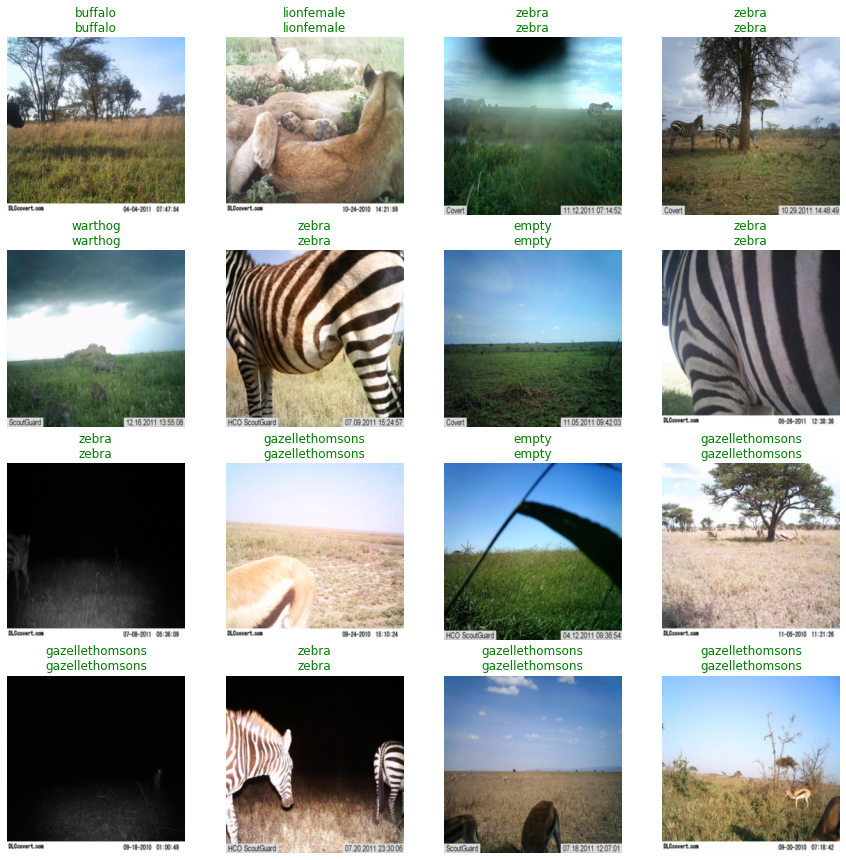

In [10]:
learn.show_results(max_n=25,figsize=(15,15))
plt.savefig('stage_3_validation_sample.png')

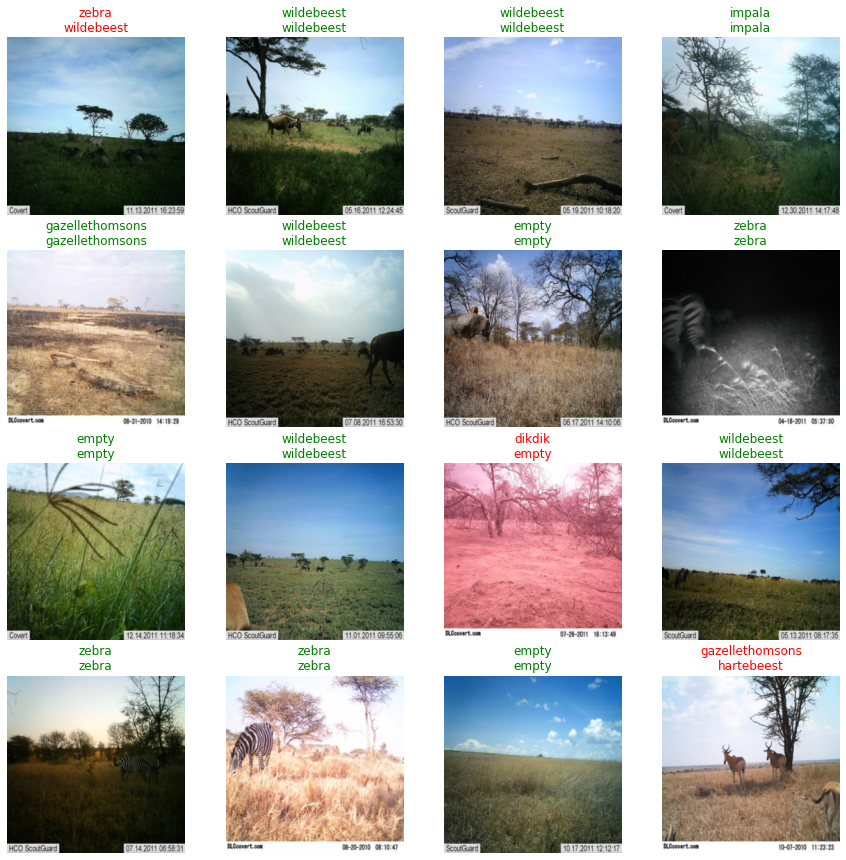

In [14]:
learn.show_results(max_n=25,figsize=(15,15))
plt.savefig('stage_3_validation_sample2.png')